## Heart Disease Research Part II

In this project, you’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository and then cleaned for analysis. The principal investigators responsible for data collection were:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### Inspect the Data
1.
The data has been saved as a dataframe named heart. It contains the following variables:

* age: age in years
* sex: sex assigned at birth; 'male' or 'female'
* trestbps: resting blood pressure in mm Hg
* chol: serum cholesterol in mg/dl
* cp: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
* exang: whether the patient experiences exercise-induced angina (1: yes; 0: no)
* fbs: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
* thalach: maximum heart rate achieved in exercise test
* heart_disease: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)


In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# load data
heart = pd.read_csv('heart_disease.csv')

#1
print(heart.head())

    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


#### Predictors of Heart Disease

2.
Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease? Use sns.boxplot() to plot side by side box plots of thalach for patients who were and were not diagnosed with heart disease (indicated by the heart_disease variable). Do you think there is a relationship between these variables?

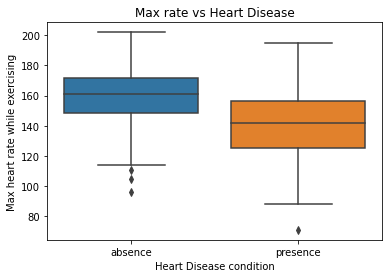

Visually it appears that heart disease presence associated with lower max heart rate while exercising.


<Figure size 432x288 with 0 Axes>

In [6]:
#2 Max heart rate while exercising (thalach) analysis
sns.boxplot(x='heart_disease', y='thalach', data=heart)
plt.xlabel('Heart Disease condition')
plt.ylabel('Max heart rate while exercising')
plt.title('Max rate vs Heart Disease')
plt.show()
plt.clf()

print("Visually it appears that heart disease presence associated with lower max heart rate while exercising.")


3. In order to investigate this question further, save the values for thalach among patients who were diagnosed with heart disease as a variable named thalach_hd. Then save the values of thalach among patients who were not diagnosed with heart disease as thalach_no_hd.

In [7]:
#3 Making dfs absence and presence 
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']
thalach_hd = yes_hd.thalach
thalach_no_hd = no_hd.thalach

4. Calculate and print the difference in mean thalach for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [8]:
#4 Mean calculation
thalach_hd_mean = np.mean(thalach_hd)
thalach_no_hd_mean = np.mean(thalach_no_hd)
mean_diff = thalach_hd_mean - thalach_no_hd_mean
print(thalach_hd_mean, thalach_no_hd_mean, mean_diff)
# Median calculation
thatlach_hd_median = np.median(thalach_hd)
thalach_no_hd_median = np.median(thalach_no_hd)
median_diff = thatlach_hd_median - thalach_no_hd_median
print(thatlach_hd_median, thalach_no_hd_median, median_diff)

139.25899280575538 158.3780487804878 -19.11905597473242
142.0 161.0 -19.0


5. We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

  Test the following null and alternative hypotheses:

* Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
* Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.

6. Run the hypothesis test from task 5 and print out the p-value. Using a significance threshold of 0.05, is there a significant difference in average thalach for people with heart disease compared to people with no heart disease?

In [9]:
#5,6 Significance test (Two sample T-Test)
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print("p-value equals: " + str(pval) + " , which is < 0.05 meaning average thalach of a heart disease is significantly different from the average thalach for a person without heart disease.")


p-value equals: 3.456964908430172e-14 , which is < 0.05 meaning average thalach of a heart disease is significantly different from the average thalach for a person without heart disease.


7. Using the same process, investigate trestbps (resting blood pressure). 

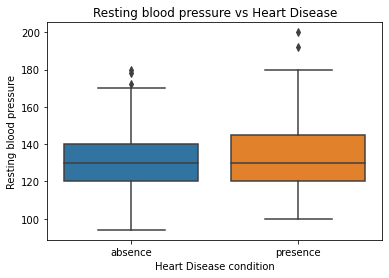

Visually it appears that heart disease presence does not associate with resting blood pressure number.
134.568345323741 129.25 5.318345323740999
130.0 130.0 0.0
p-value equals: 0.008548268928594928 , which is < 0.05 meaning average trestbps of a heart disease is significantly different from the average trestbps for a person without heart disease. Which can not been seen visually of side-by-side boxplot.


<Figure size 432x288 with 0 Axes>

In [10]:
#7 Resting blood pressure (trestbps) analysis
sns.boxplot(x='heart_disease', y='trestbps', data=heart)
plt.xlabel('Heart Disease condition')
plt.ylabel('Resting blood pressure')
plt.title('Resting blood pressure vs Heart Disease')
plt.show()
plt.clf()

print("Visually it appears that heart disease presence does not associate with resting blood pressure number.")

# Making dfs absence and presence 
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']
trestbps_hd = yes_hd.trestbps
trestbps_no_hd = no_hd.trestbps

# Mean calculation
trestbps_hd_mean = np.mean(trestbps_hd)
trestbps_no_hd_mean = np.mean(trestbps_no_hd)
mean_diff_trest = trestbps_hd_mean - trestbps_no_hd_mean
print(trestbps_hd_mean, trestbps_no_hd_mean, mean_diff_trest)
# Median calculation
trestbps_hd_median = np.median(trestbps_hd)
trestbps_no_hd_median = np.median(trestbps_no_hd)
median_diff_trest = trestbps_hd_median - trestbps_no_hd_median
print(trestbps_hd_median, trestbps_no_hd_median, median_diff_trest)

# Significance test (Two sample T-Test)
from scipy.stats import ttest_ind
tstat, pval_trest = ttest_ind(trestbps_hd, trestbps_no_hd)
print("p-value equals: " + str(pval_trest) + " , which is < 0.05 meaning average trestbps of a heart disease is significantly different from the average trestbps for a person without heart disease. Which can not been seen visually of side-by-side boxplot.")


#### Chest Pain and Max Heart Rate
8. Next, let’s investigate the relationship between thalach (maximum heart rate achieved during exercise) and the type of heart pain a person experiences. Create a set of side-by-side box plots of thalach for each chest pain type in the data. 

  Are there any chest pain types for which average thalach is significantly higher or lower (compared     to other chest pain types)?

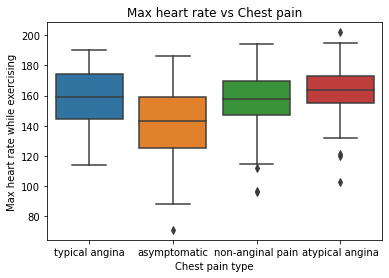

An asymptomatic chest pain is visually distinguished by a lower maximum heart rates during exercise.


<Figure size 432x288 with 0 Axes>

In [11]:
#8 Chest pains and max heart rate while exercising
sns.boxplot(x='cp', y='thalach', data=heart)
plt.xlabel('Chest pain type')
plt.ylabel('Max heart rate while exercising')
plt.title('Max heart rate vs Chest pain')
plt.show()
plt.clf()

print("An asymptomatic chest pain is visually distinguished by a lower maximum heart rates during exercise.")


9. To investigate this further, save the values of thalach for patients who experienced each type of chest pain as thalach_typical, thalach_asymptom, thalach_nonangin, and thalach_atypical, respectively.

In [12]:
#9 Dfs of thalach and chest pains
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

10. Run a single hypothesis test to address the following null and alternative hypotheses:

* Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all       have the same average thalach.
* Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people     do not all have the same average thalach.
  Using a significance threshold of 0.05, is there at least one pair of chest pain categories for         which people in those categories have significantly different thalach?

In [14]:
#10 Signifance test (ANOVA + Tukey test)
# ANOVA test
from scipy.stats import f_oneway
fstat, pval_anova = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print(pval_anova)
print("Since p-value is less than 0.05 we can say that there is a significant difference between at least one pair of chest pains")


1.9065505247705008e-10
Since p-value is less than 0.05 we can say that there is a significant difference between at least one pair of chest pains


11. Run another hypothesis test to determine which of those pairs are significantly different. Use an overall type I error rate of 0.05 for all six comparisons.

In [15]:
#11 Tukey range test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_results)
print("Null hypothesis is rejected for all pairs with asymptomatic pain. Meaning there is a significant difference in average thalach.")


           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------
Null hypothesis is rejected for all pairs with asymptomatic pain. Meaning there is a significant difference in average thalach.


#### Heart Disease and Chest Pain
12. Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease.

In [16]:
#12 Significance test (Chi-Square Test)
# contingency table of chest pain and disease state
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


13. Run a hypothesis test for the following null and alternative hypotheses:

* Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
* Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.
Using a significance threshold of 0.05, is there a significant association between chest pain type and whether or not someone is diagnosed with heart disease?

In [17]:
#13 Chi-Square Test
from scipy.stats import chi2_contingency
chi2, pval_chi, dof, expected = chi2_contingency(Xtab)
print(pval_chi)
print("Since p-value is less than 0.05 we reject the null hypothesis and can conclude there is a statistically significant association between chest pain type and heart disease state.")


1.2517106007837527e-17
Since p-value is less than 0.05 we reject the null hypothesis and can conclude there is a statistically significant association between chest pain type and heart disease state.


#### Heart Disease and Fasting Blood Sugar
14. Fasting blood sugar (fbs) analysis. And hypothesis test for the following null and alternative hypotheses:
* Null: There is NOT an association between fasting blood sugar and whether or not someone is diagnosed with heart disease.
* Alternative: There is an association between fasting blood sugar and whether or not someone is diagnosed with heart disease.
Using a significance threshold of 0.05, is there a significant association between fasting blood sugar and whether or not someone is diagnosed with heart disease?

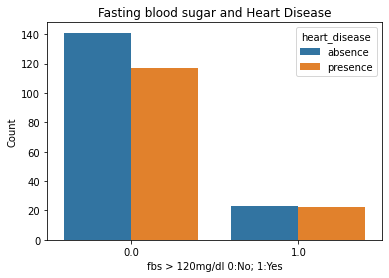

Visually there is no any association.
heart_disease  absence  presence
fbs                             
0.0                141       117
1.0                 23        22
0.7812734067063785
Since p-value is more than 0.05 we accept the null hypothesis and there is NOT an association between fasting blood sugar and whether or not someone is diagnosed with heart disease.


<Figure size 432x288 with 0 Axes>

In [19]:
#14 Fasting blood sugar (fbs) analysis
sns.countplot(data=heart,x='fbs', hue='heart_disease')
plt.xlabel('fbs > 120mg/dl 0:No; 1:Yes')
plt.ylabel('Count')
plt.title('Fasting blood sugar and Heart Disease')
plt.show()
plt.clf()

print("Visually there is no any association.")

# contingency table
fbs_table = pd.crosstab(heart.fbs, heart.heart_disease)
print(fbs_table)
# Chi-Square Test
chi2, pval_fbs, dof, expected = chi2_contingency(fbs_table)
print(pval_fbs)
print("Since p-value is more than 0.05 we accept the null hypothesis and there is NOT an association between fasting blood sugar and whether or not someone is diagnosed with heart disease.")

